# 1. Trabajo Final Data Science I: Predicción de calidad y duración del sueño


## 1.1 Introducción del Dataset

El Dataset presenta información proporcionada por 20000 personas sobre diversos factores que afectan la calidad del sueño y la salud visual, incluyendo duración del sueño, niveles de estrés, actividad física practicada, historial médico, y uso del celular antes de dormir. Entender la relación entre la calidad del sueño, los niveles de estrés, y la exposición a las pantallas puede ser de ayuda al analizar cómo el estilo de vida moderno impacta en la salud.

**Nombre:** Dry Eye Disease
**Fuente:** Kaggle

**Descripción de columnas**
* Gender: género del individuo (M/F) – dato cualitativo
* Age: edad del individuo en años – dato cuantitativo
* Sleep duration: promedio de la duración del sueño en horas – dato cuantitativo
* Sleep quality: calidad del sueño reportada (Escala: 1- Muy mala, 2- Mala, 3- Buena, 4- Muy buena y 5- Excelente) – dato cualitativo
* Stress level: nivel de estrés (Escala: 1- Muy bajo, 2- Bajo, 3- Medio, 4- Alto y 5- Muy alto) – dato cualitativo
* Blood pressure: Presión arterial (Sistólico / diastólico en mmHg) – dato cuantitativo
* Heart rate: frecuencia cardíaca (lpm= latidos por minuto) – dato cuantitativo
* Daily steps: pasos diarios promedios – dato cuantitativo
* Physical activity: minutos de actividad física por día – dato cuantitativo
* Height: altura en cm – dato cuantitativo
* Weight: peso en kg- dato cuantitativo
* Sleep disorder: trastorno del sueño (Y/N) - dato cualitativo
* Wake up during night: sueño interrumpido (Y/N) - dato cualitativo
* Smoker: fumador (Y/N) - dato cualitativo
* Caffeine consumption: consumo de cafeína (Y/N) - dato cualitativo
* Alcohol consumption: consumo de alcohol (Y/N) - dato cualitativo
*	Medical issues: condición médica existente (Y/N) - dato cualitativo
*	Ongoing medication: medicación en curso (Y/N) - dato cualitativo
*	Smart device before bed: uso del celular antes de dormir (Y/N)
*	Average screentime: tiempo de pantalla diario promedio en horas – dato cuantitativo
*	Blue light filter: uso de filtro luz azul (Y/N) – dato cualitativo
*	Discomfort Eye-strain: presencia de fatiga visual (Y/N) – dato cualitativo
* Redness in eye: ojos rojos (Y/N) – dato cualitativo
*	Irritation in eye: irritación o picazón en los ojos (Y/N) -dato cualitativo
*	Dry eye disease: diagnóstico o síntomas de enfermedad del ojo seco (Y/N) – dato cualitativo

## 1.2 Objetivos
1. El objetivo es desarrollar un modelo de clasificación que pueda predecir la **calidad del sueño** (en una escala de 1 a 5) basándose en las características demográficas y de estilo de vida disponibles (género, edad, nivel de estrés, actividad física, consumo de sustancias, uso de pantallas y estado de salud).
2. El objetivo es desarrollar un modelo de regresión que pueda predecir la duración del sueño (en horas) basándose en las características demográficas y de estilo de vida disponibles (género, edad, nivel de estrés, actividad física, consumo de sustancias, uso de pantallas y estado de salud).

## 1.3 Hipótesis
**Calidad de sueño**
- Hipótesis Nula (H0): Las características clínicas y demográficas disponibles no son suficientes para predecir la calidad del sueño con una precisión significativamente mejor que el azar (en un problema de clasificación multiclase, el azar sería 1/número de clases, es decir, 1/5 = 20%).
- Hipótesis Alternativa (H1): Es posible construir un modelo de clasificación ( Random Forest Classifier) utilizando las características clínicas y demográficas que prediga la calidad del sueño con una precisión significativamente superiores al azar. Esperamos alcanzar una precisión promedio > 40%.

**Duración del sueño**
- Hipótesis Nula (H0): Las características clínicas y demográficas disponibles no son suficientes para predecir la duración del sueño mejor que un modelo ingenuo.
- Hipótesis Alternativa (H1): Es posible construir un modelo de regresión utilizando las características clínicas y demográficas que prediga la duración del sueño con un error significativamente menor que un modelo ingenuo. Esperamos alcanzar un R-cuadrado (R²) > 0.60.

# 2.Importación de las librerías y carga de datos

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [167]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
df = pd.read_excel('/content/drive/MyDrive/coder/data scientist/Dry_Eye.xlsx')

In [170]:
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


In [171]:
df.shape

(20000, 26)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

## 2.1 Separación de la columna Blood Pressure

Ya que el dato de la presión sanguínea que está en el data set es presión sistólica/ presión diastólica se divide la columna en dos.

In [173]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood pressure'].str.split('/', expand=True)

# Convertir las nuevas columnas a tipo numérico (entero)
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'])
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'])

# Puedes eliminar la columna original de "Blood pressure" si ya no la necesitas
df = df.drop('Blood pressure', axis=1)

print(df[['Systolic BP', 'Diastolic BP']].head())
print(df[['Systolic BP', 'Diastolic BP']].info())

   Systolic BP  Diastolic BP
0          137            89
1          108            64
2          134            81
3          110            90
4           99            67
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Systolic BP   20000 non-null  int64
 1   Diastolic BP  20000 non-null  int64
dtypes: int64(2)
memory usage: 312.6 KB
None


## 2.2 Comprobación de valores únicos en columnas binarias

In [174]:
for col in ['Sleep disorder', 'Wake up during night', 'Feel sleepy during day',
            'Caffeine consumption', 'Alcohol consumption', 'Smoking',
            'Medical issue', 'Ongoing medication']:
    print(f"Valores únicos en la columna '{col}': {df[col].unique()}")

Valores únicos en la columna 'Sleep disorder': ['Y' 'N']
Valores únicos en la columna 'Wake up during night': ['N' 'Y']
Valores únicos en la columna 'Feel sleepy during day': ['N' 'Y']
Valores únicos en la columna 'Caffeine consumption': ['N' 'Y']
Valores únicos en la columna 'Alcohol consumption': ['N' 'Y']
Valores únicos en la columna 'Smoking': ['N' 'Y']
Valores únicos en la columna 'Medical issue': ['Y' 'N']
Valores únicos en la columna 'Ongoing medication': ['Y' 'N']


## 2.3 Conversión de columnas binarias a valor numérico

In [175]:
# Lista de las columnas binarias
binary_cols = ['Sleep disorder', 'Wake up during night', 'Feel sleepy during day',
               'Caffeine consumption', 'Alcohol consumption', 'Smoking',
               'Medical issue', 'Ongoing medication', 'Smart device before bed',
               'Blue-light filter', 'Discomfort Eye-strain', 'Redness in eye',
               'Itchiness/Irritation in eye', 'Dry Eye Disease']

# Conversión
for col in binary_cols:
    df[col] = df[col].str.strip().map({'Y': 1, 'N': 0})

# Para la columna 'Gender'
df['Gender'] = df['Gender'].str.strip().map({'F': 1, 'M': 0})

# Primeras filas de las columnas convertidas
print(df[binary_cols + ['Gender']].head())

# Información de las columnas convertidas para verificar el tipo de dato
print(df[binary_cols + ['Gender']].info())

   Sleep disorder  Wake up during night  Feel sleepy during day  \
0               1                     0                       0   
1               0                     0                       0   
2               1                     1                       0   
3               0                     0                       0   
4               0                     1                       0   

   Caffeine consumption  Alcohol consumption  Smoking  Medical issue  \
0                     0                    0        0              1   
1                     0                    1        0              1   
2                     1                    1        0              0   
3                     1                    0        0              1   
4                     0                    0        0              1   

   Ongoing medication  Smart device before bed  Blue-light filter  \
0                   1                        0                  0   
1                   1     

Para todas aquellas variables cuyos datos se divida en Y (sí) y N (no) Y=1 y N=0. Para la variable Gender F=1 y M=0.

# 3.Análisis exploratorio de Datos para predicción de calidad de sueño

## 3.1 Revisión de los valores faltantes

In [176]:
missing_values = df.isnull().sum()

In [177]:
missing_values

,0
Gender,0
Age,0
Sleep duration,0
Sleep quality,0
Stress level,0
Heart rate,0
Daily steps,0
Physical activity,0
Height,0
Weight,0


El resultado me indca que no tengo valores faltantes.

## 3.2 Análisis de las variables numéricas

In [178]:
df.describe()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,...,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.498600,31.422800,6.998245,2.997250,2.993750,79.912200,10536.900000,90.069750,174.865900,74.891850,...,0.504100,0.500150,5.519885,0.499200,0.501850,0.493550,0.496850,0.651850,114.985450,74.999300
std,0.500011,8.103717,1.731723,1.412283,1.407235,11.808279,5752.729186,52.317283,14.719903,14.733839,...,0.499996,0.500012,2.606305,0.500012,0.500009,0.499971,0.500003,0.476396,14.725589,8.975034
min,0.000000,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000
25%,0.000000,24.000000,5.500000,2.000000,2.000000,70.000000,6000.000000,45.000000,162.000000,62.000000,...,0.000000,0.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,102.000000,67.000000
50%,0.000000,31.000000,7.000000,3.000000,3.000000,80.000000,11000.000000,91.000000,175.000000,75.000000,...,1.000000,1.000000,5.500000,0.000000,1.000000,0.000000,0.000000,1.000000,115.000000,75.000000
75%,1.000000,39.000000,8.500000,4.000000,4.000000,90.000000,16000.000000,135.000000,188.000000,88.000000,...,1.000000,1.000000,7.800000,1.000000,1.000000,1.000000,1.000000,1.000000,128.000000,83.000000
max,1.000000,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,...,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,90.000000


In [179]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features

['Gender',
 'Age',
 'Sleep duration',
 'Sleep quality',
 'Stress level',
 'Heart rate',
 'Daily steps',
 'Physical activity',
 'Height',
 'Weight',
 'Sleep disorder',
 'Wake up during night',
 'Feel sleepy during day',
 'Caffeine consumption',
 'Alcohol consumption',
 'Smoking',
 'Medical issue',
 'Ongoing medication',
 'Smart device before bed',
 'Average screen time',
 'Blue-light filter',
 'Discomfort Eye-strain',
 'Redness in eye',
 'Itchiness/Irritation in eye',
 'Dry Eye Disease',
 'Systolic BP',
 'Diastolic BP']

In [180]:
# Variables categóricas codificadas numéricamente:
categorical_coded_num = ['Gender', 'Sleep quality', 'Stress level', 'Sleep disorder', 'Wake up during night', 'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption', 'Smoking', 'Medical issue', 'Ongoing medication',
                         'Smart device before bed', 'Blue-light filter', 'Discomfort Eye-strain', 'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease']

In [181]:
numerical_continuous = [col for col in numerical_features if col not in categorical_coded_num]

In [182]:
numerical_continuous

['Age',
 'Sleep duration',
 'Heart rate',
 'Daily steps',
 'Physical activity',
 'Height',
 'Weight',
 'Average screen time',
 'Systolic BP',
 'Diastolic BP']

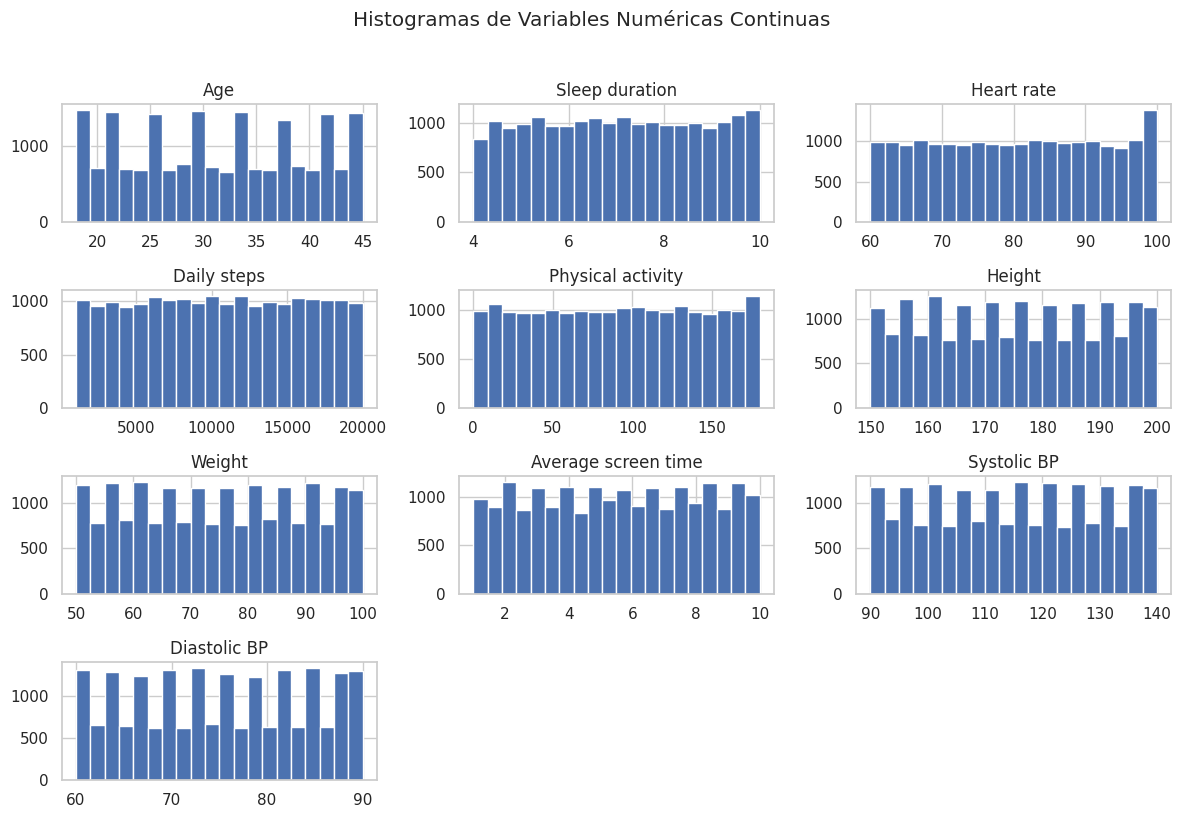

In [183]:
# Histogramas para variables continuas
df[numerical_continuous].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histogramas de Variables Numéricas Continuas', y=1.02)
plt.tight_layout()
plt.show()

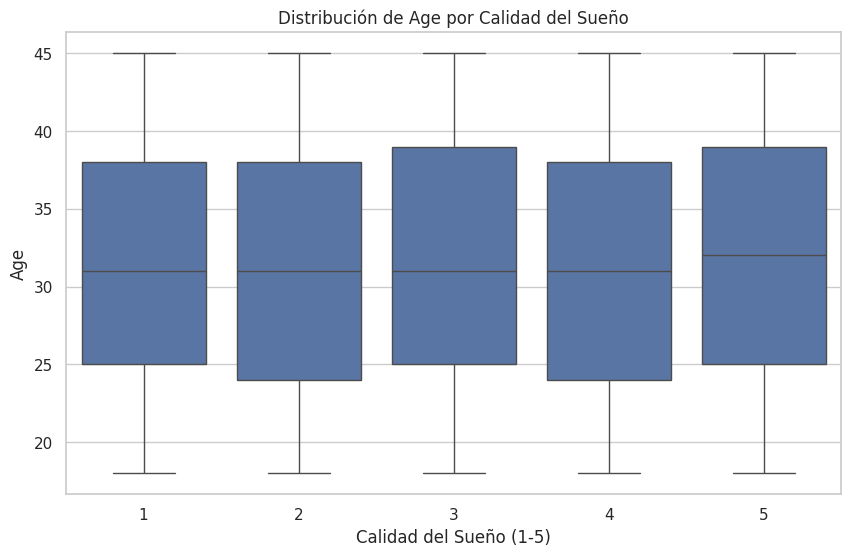

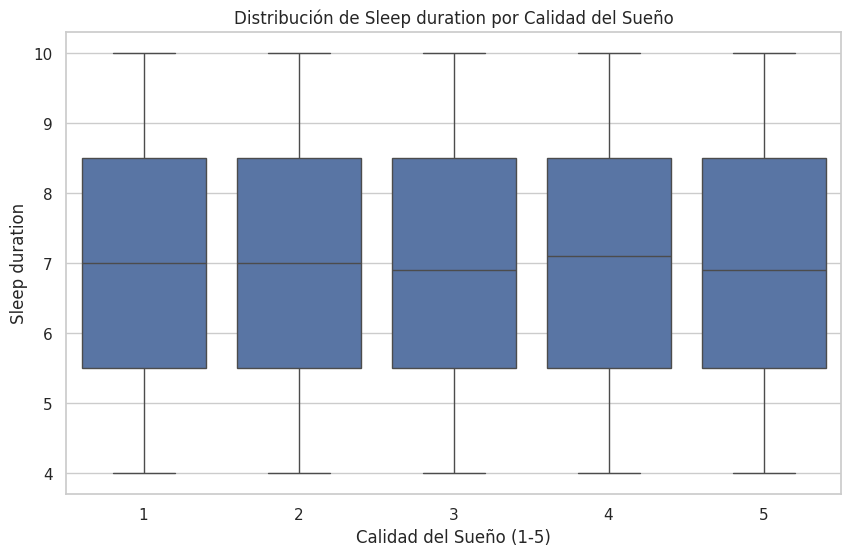

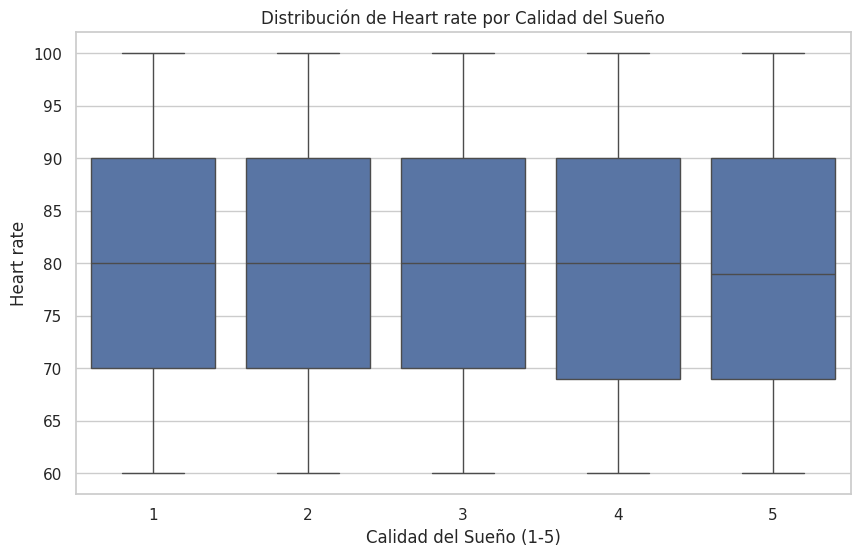

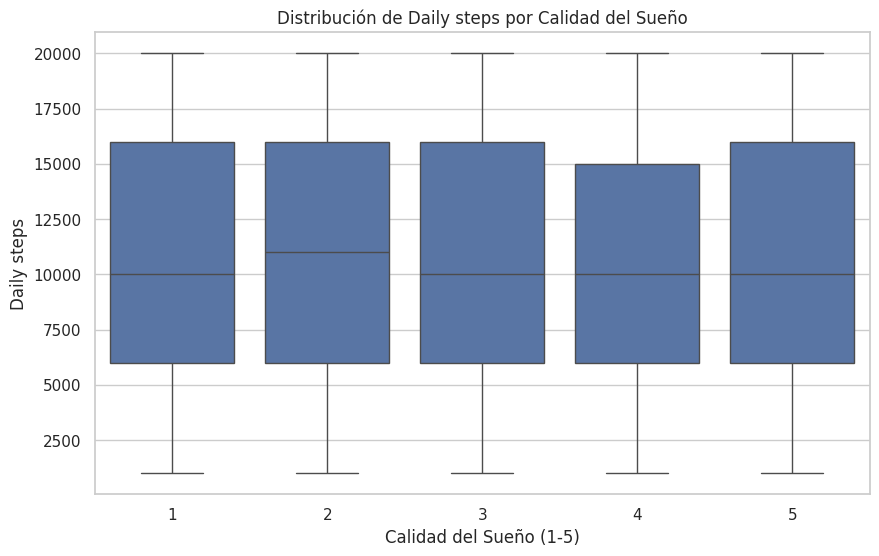

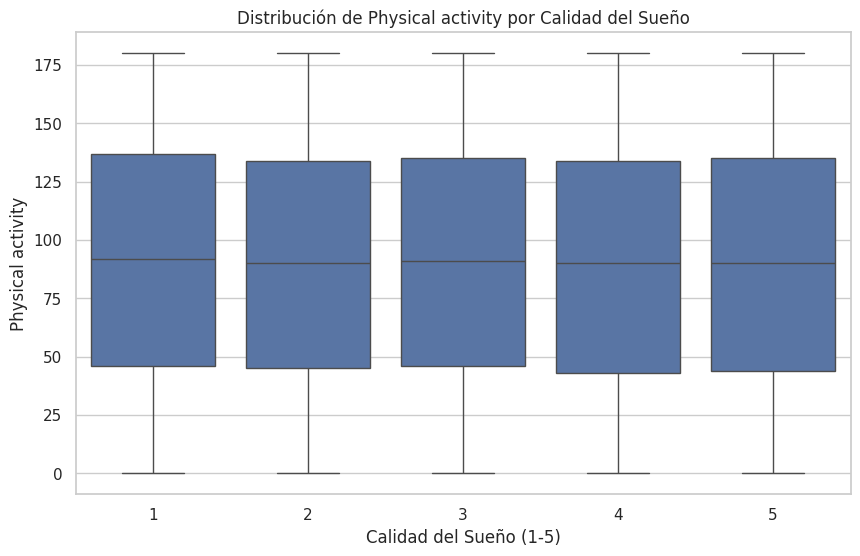

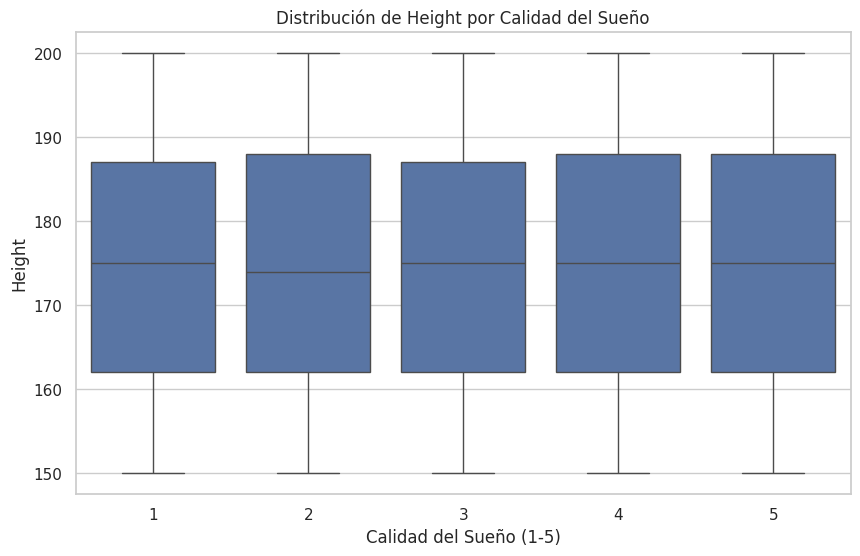

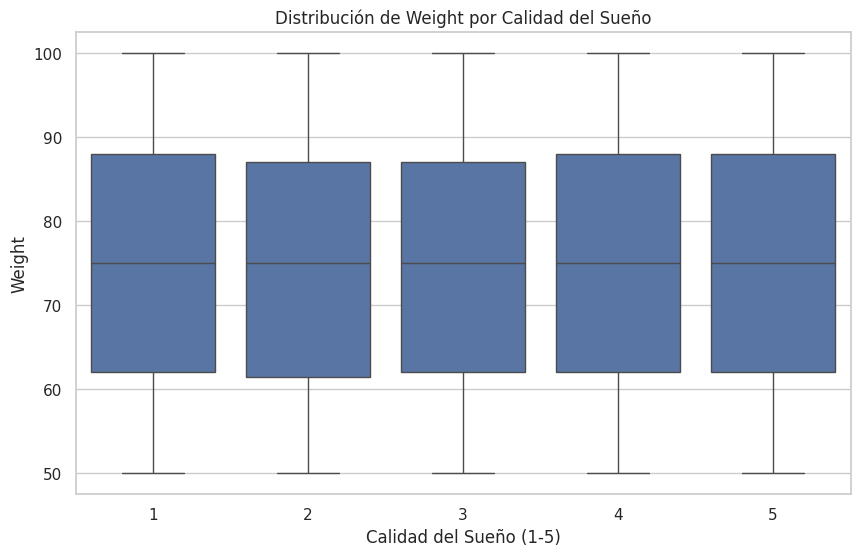

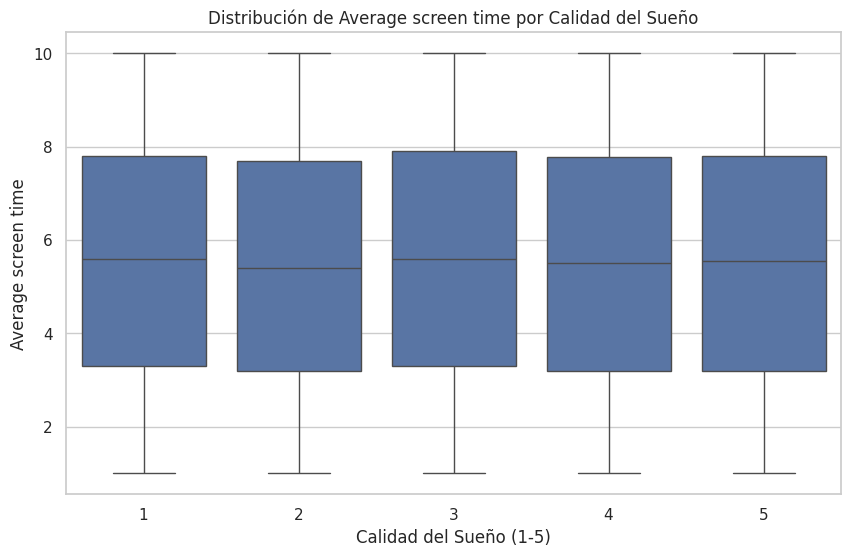

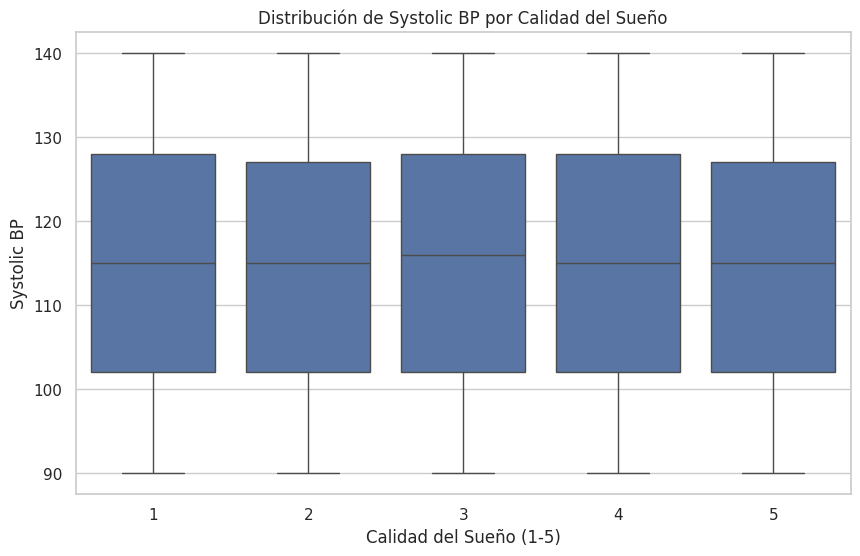

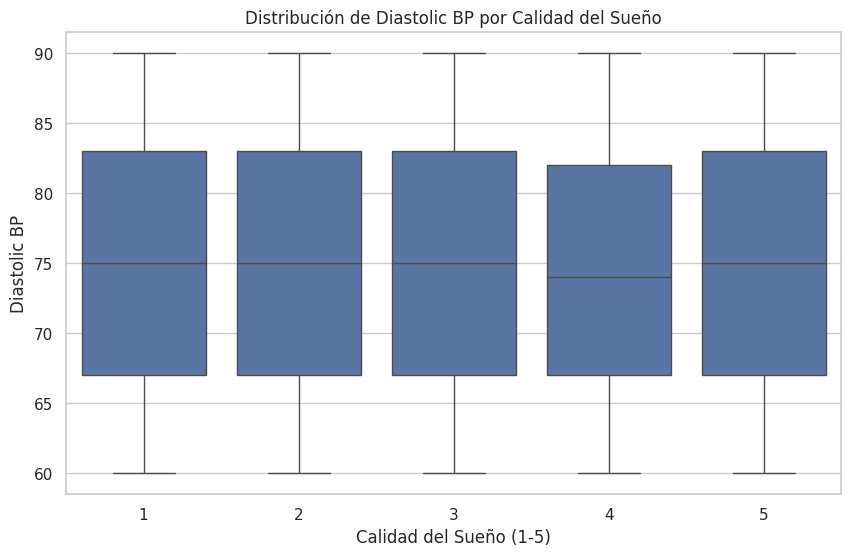

In [184]:
# Boxplot para cada variable cuantitativa en relación con la calidad del sueño
for col in numerical_continuous:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Sleep quality', y=col)
    plt.title(f'Distribución de {col} por Calidad del Sueño')
    plt.xlabel('Calidad del Sueño (1-5)')
    plt.ylabel(col)
    plt.show()

No se observan Outliers presentes.

## 3.3 Análisis variables categóricas

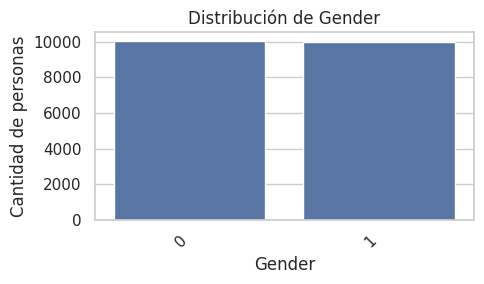

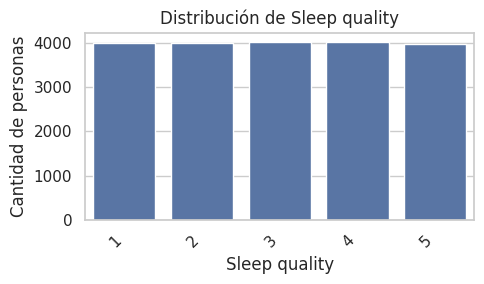

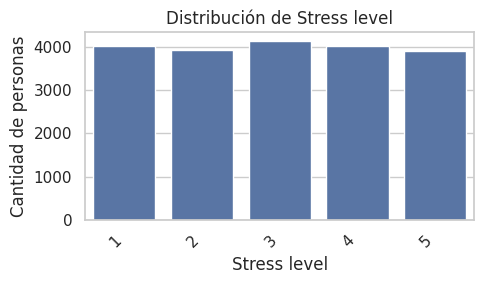

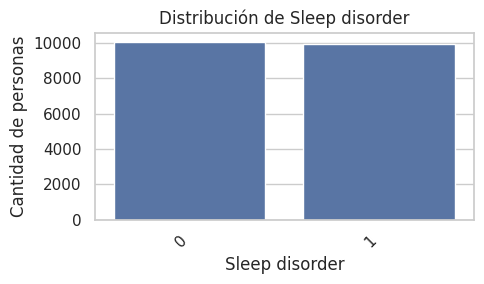

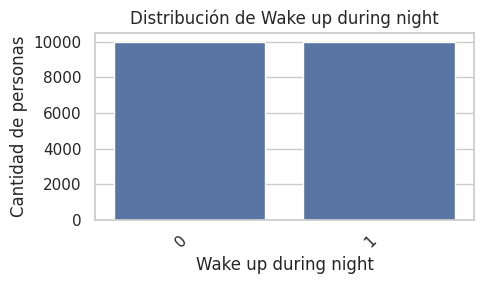

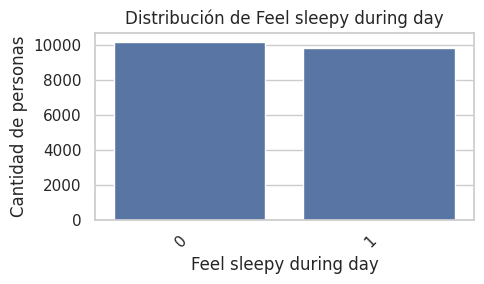

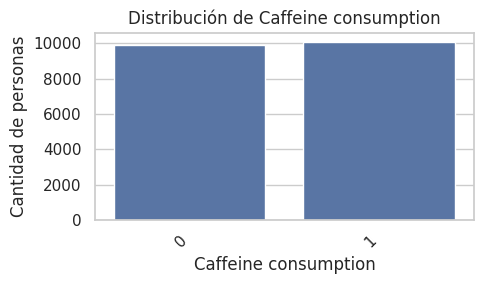

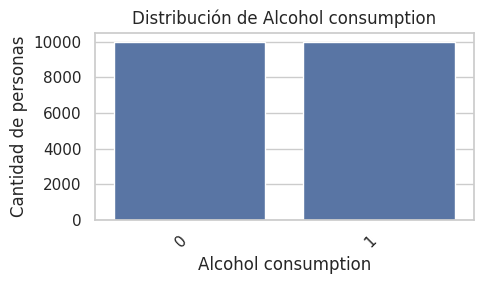

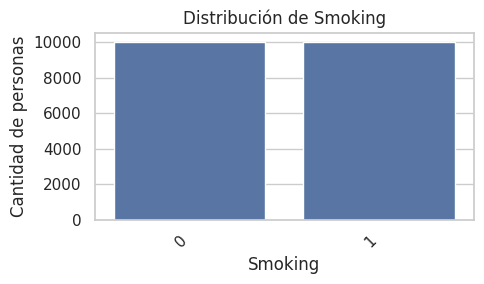

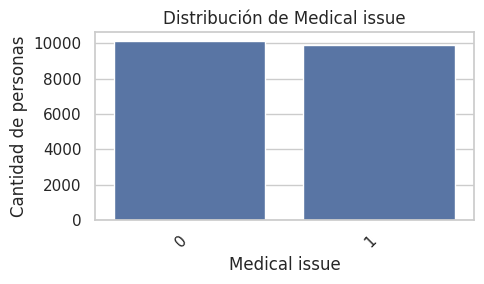

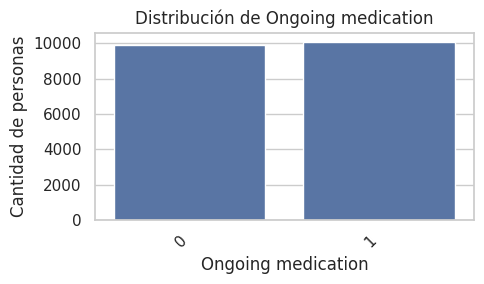

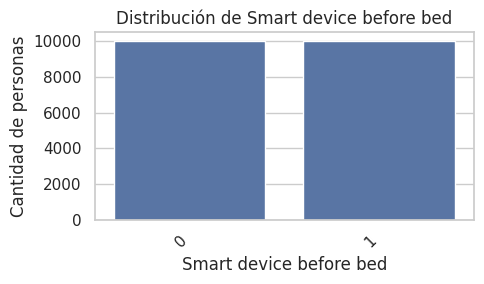

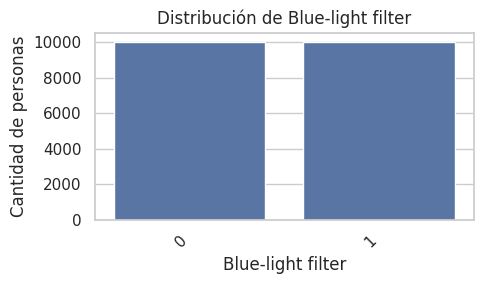

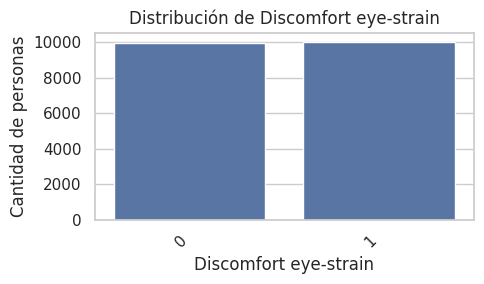

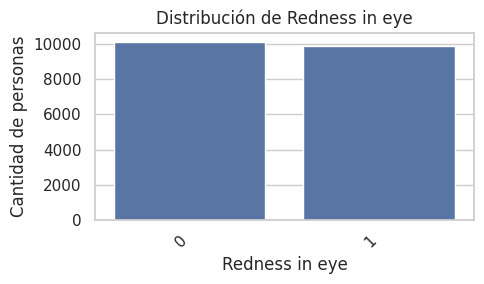

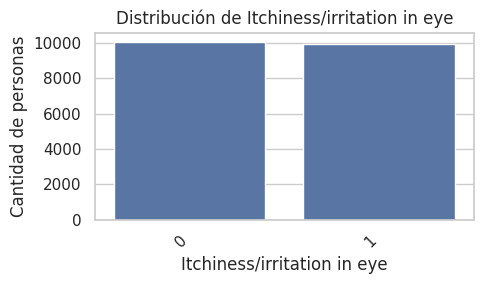

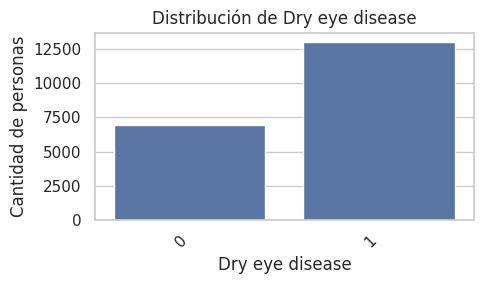

In [185]:
# Gráfico de barras para cada variable categórica
for col in categorical_coded_num:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribución de {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Cantidad de personas')
    plt.xticks(rotation=45, ha='right')  # Rotación etiquetas para mejor legibilidad
    plt.tight_layout()  # Ajuste del layout para evitar que las etiquetas se superpongan
    plt.show()

Observo que en todas las variables categóricas, con excepción de la variable Dry eye disease, la distribución es homogénea.

Defino categorical_features sin Sleep quality para luego usarlo como hue.

In [186]:
categorical_features = ['Gender', 'Stress level', 'Sleep disorder', 'Wake up during night', 'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption', 'Smoking', 'Medical issue', 'Ongoing medication','Smart device before bed', 'Blue-light filter', 'Discomfort Eye-strain', 'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease']

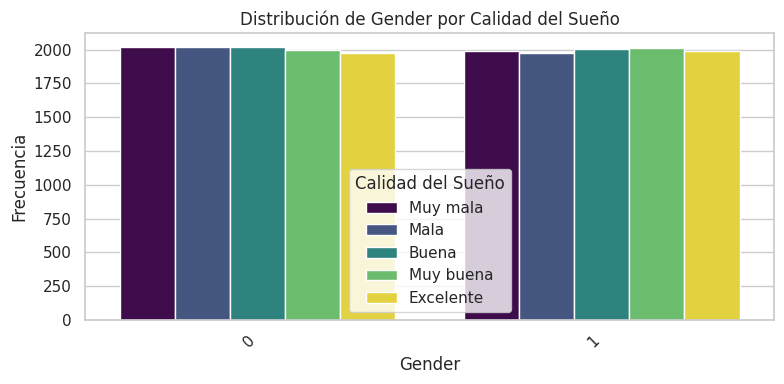

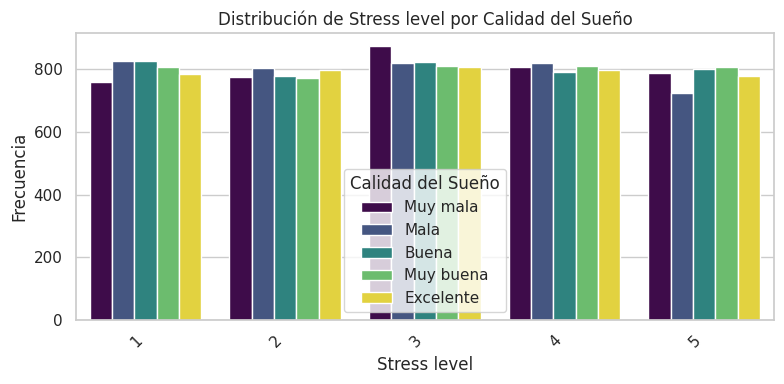

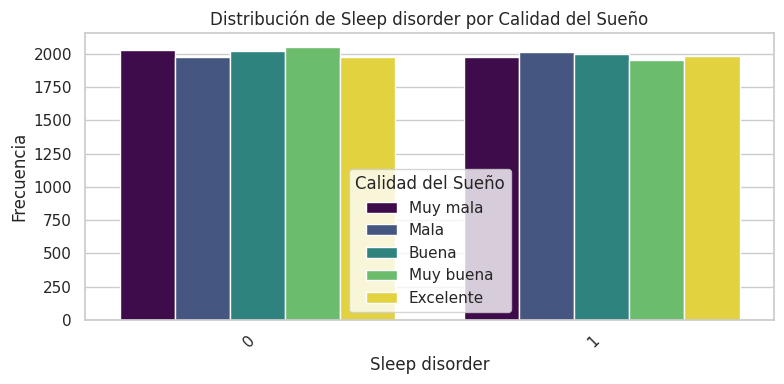

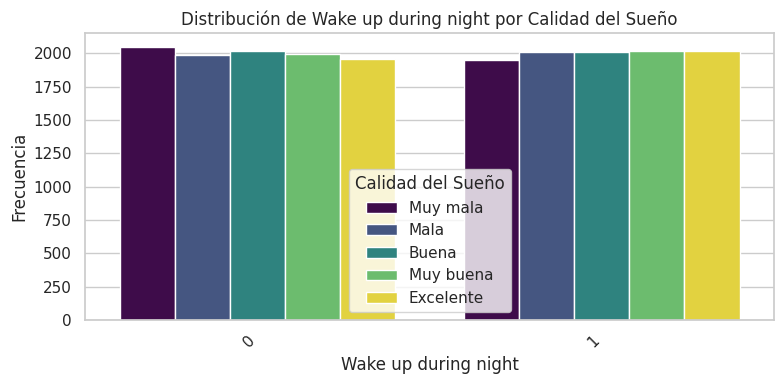

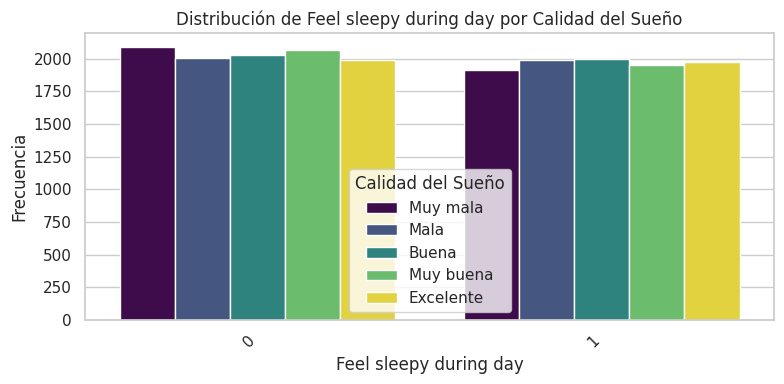

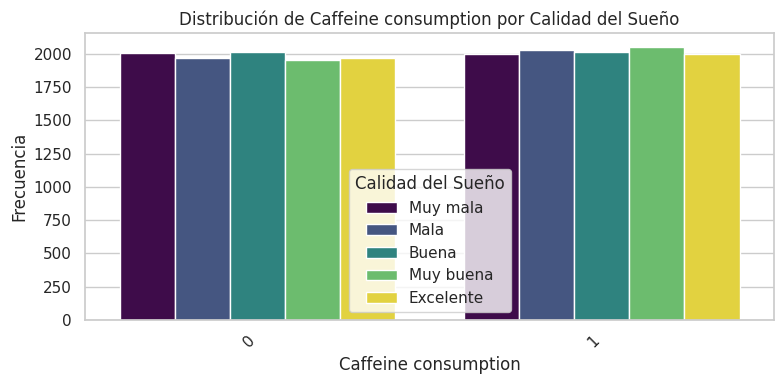

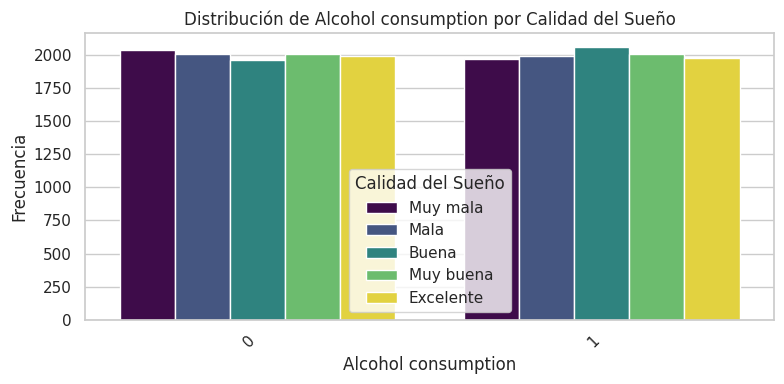

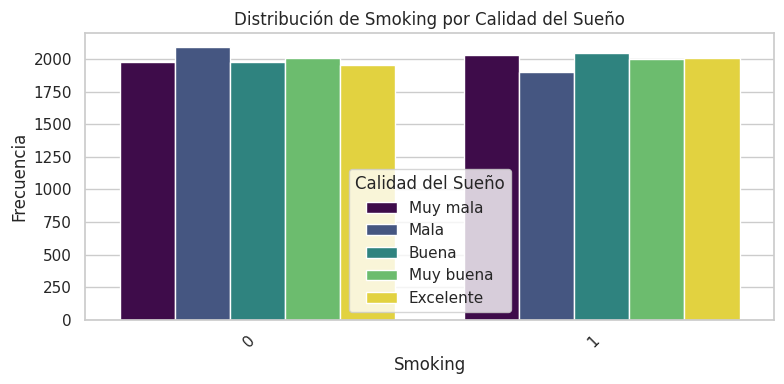

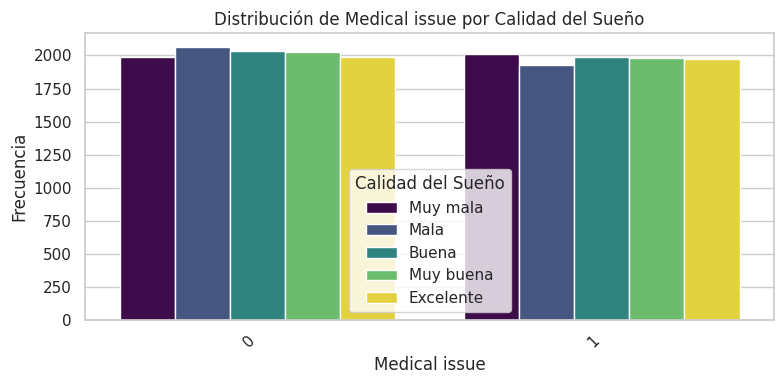

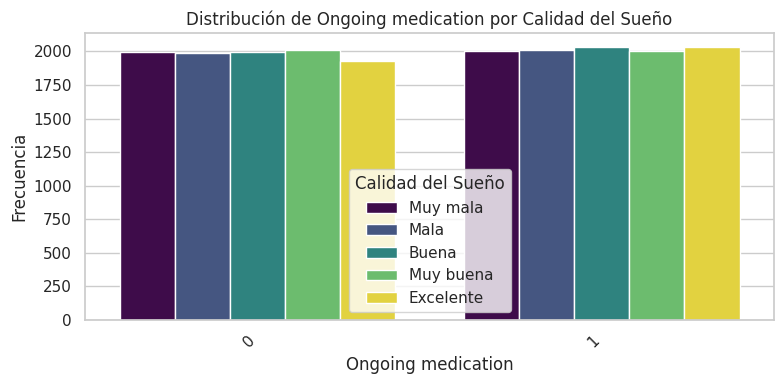

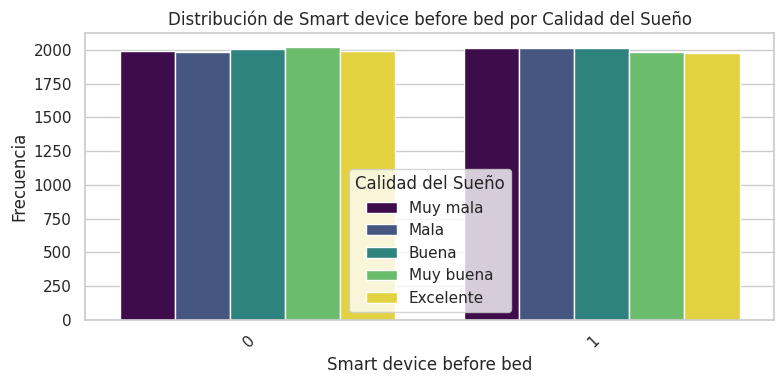

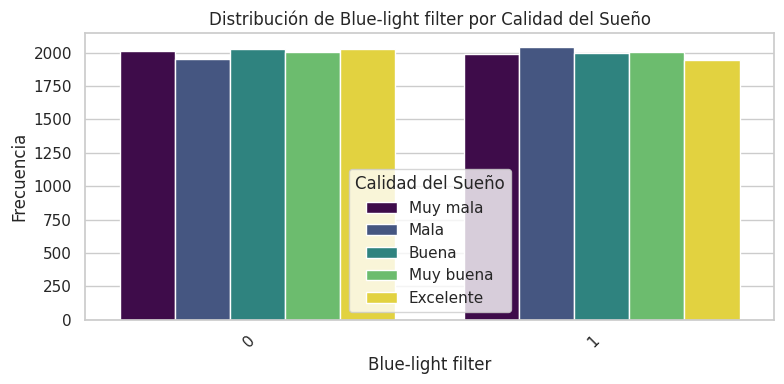

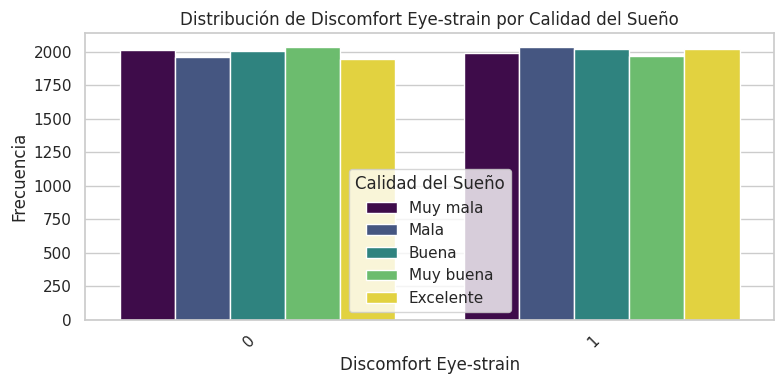

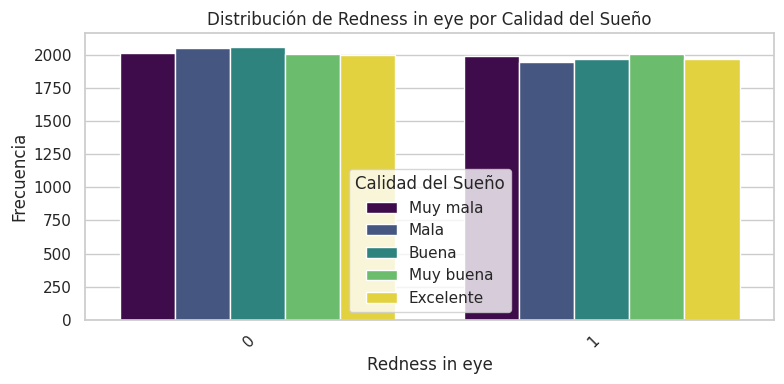

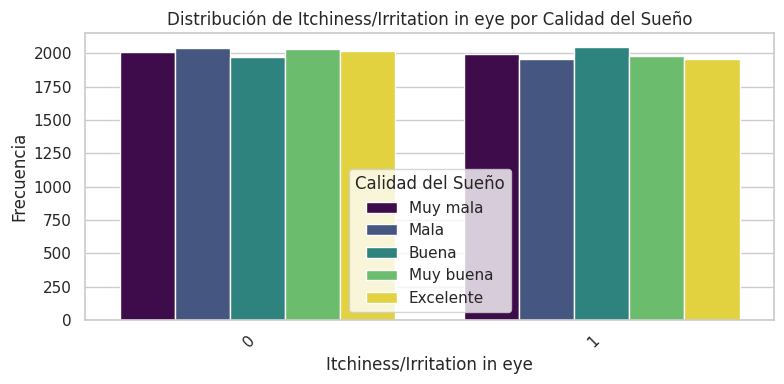

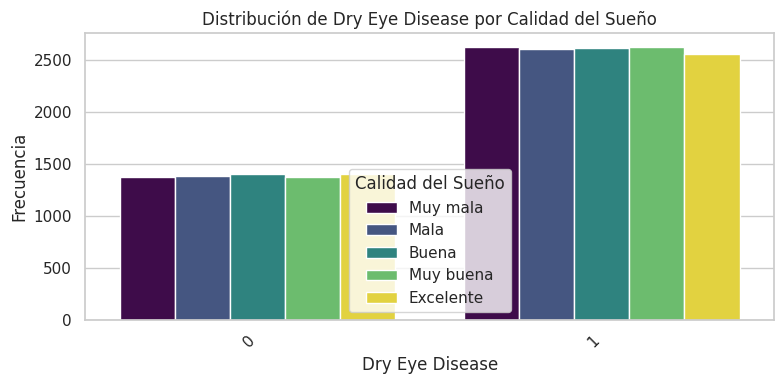

In [187]:
# Gráfico de barras para cada variable categórica, separado por calidad del sueño
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Sleep quality', palette='viridis')
    plt.title(f'Distribución de {col} por Calidad del Sueño')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Calidad del Sueño', labels=['Muy mala', 'Mala', 'Buena', 'Muy buena', 'Excelente'])  # Leyenda para la calidad del sueño
    plt.tight_layout()
    plt.show()

Se osberva que las variables categóricas cuentan con una distribución bastante similar también con el hue= Sleep quality. Lo que si es llamativo es que las personas que sí cuentan con Síndrome del ojo seco (Dry Eye Disease) son mucho menos que las que no.

Análisis con variables normalizadas: comparo las proporciones de cada nivel de calidad de sueño dentro de cada categoría.

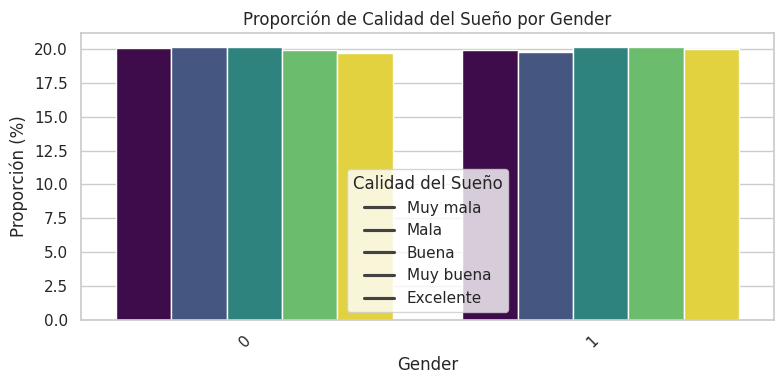

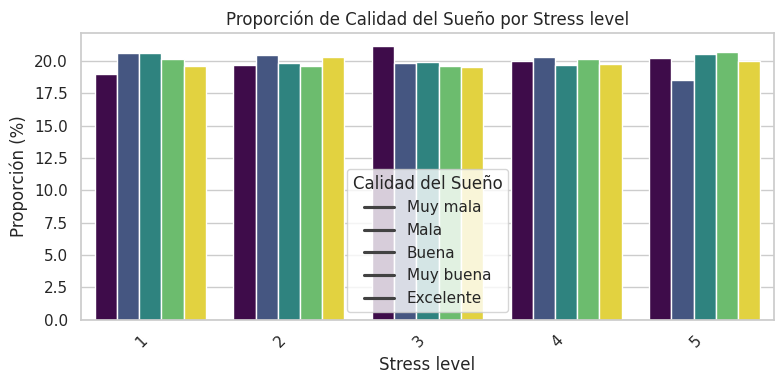

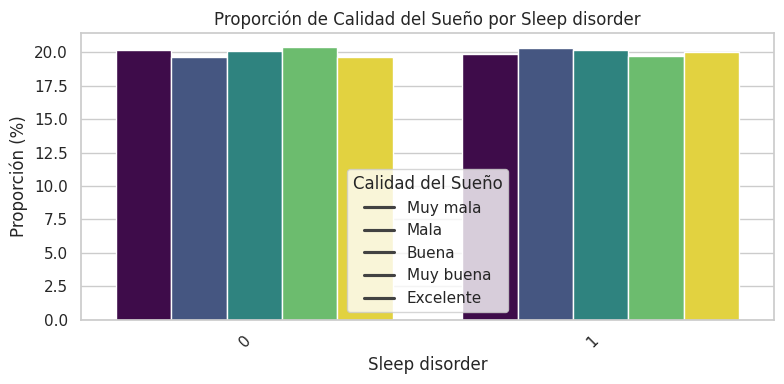

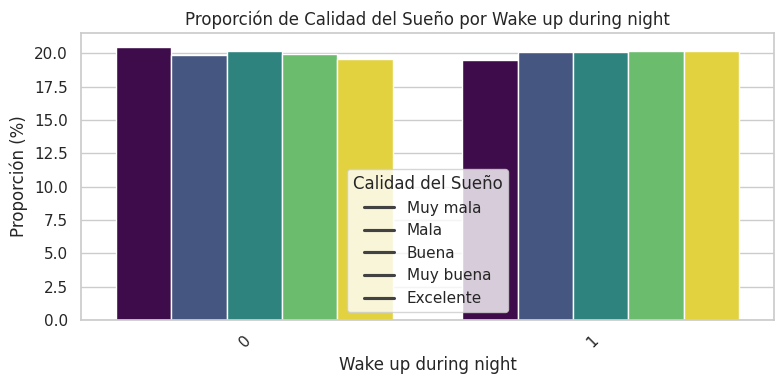

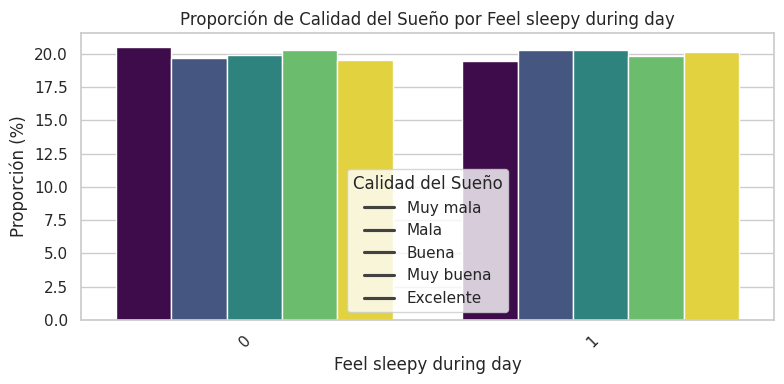

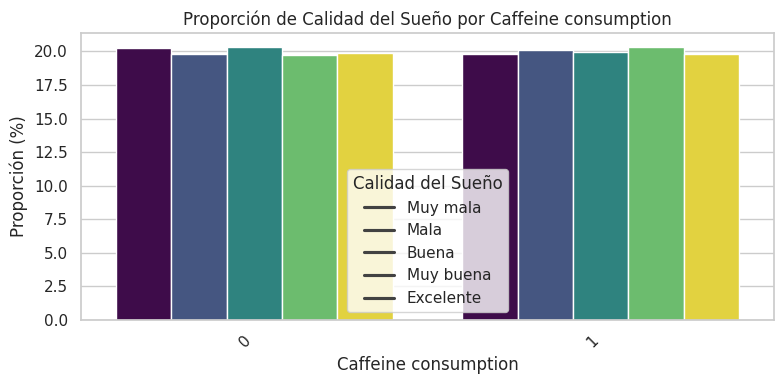

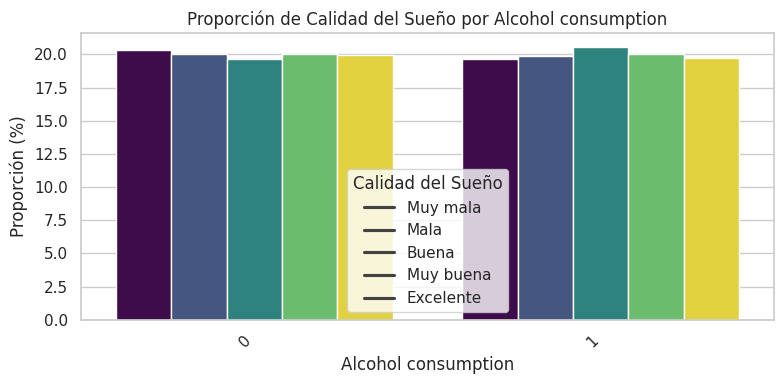

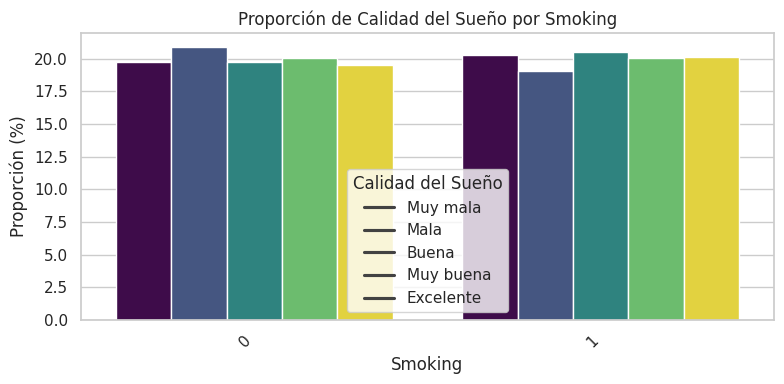

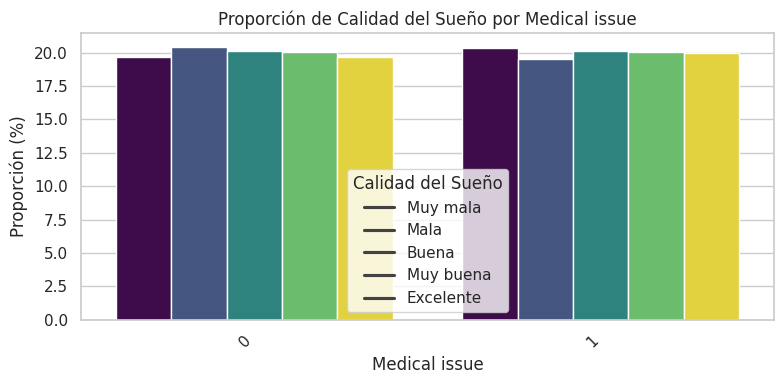

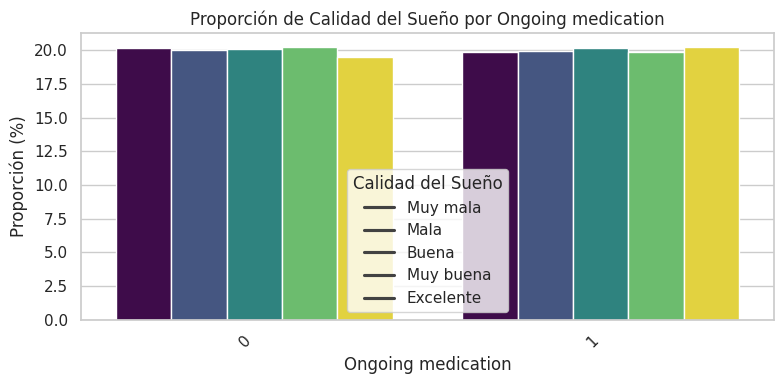

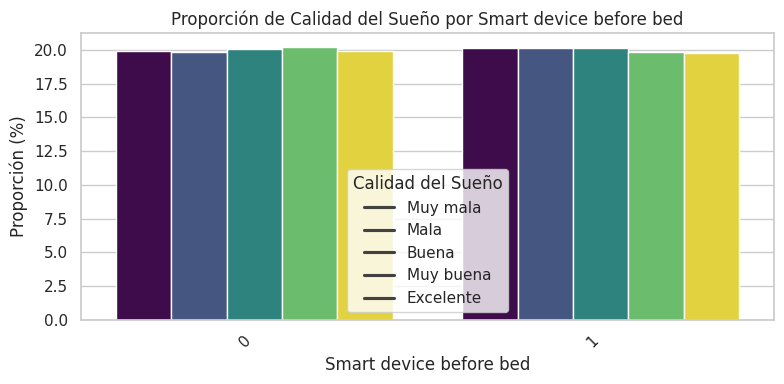

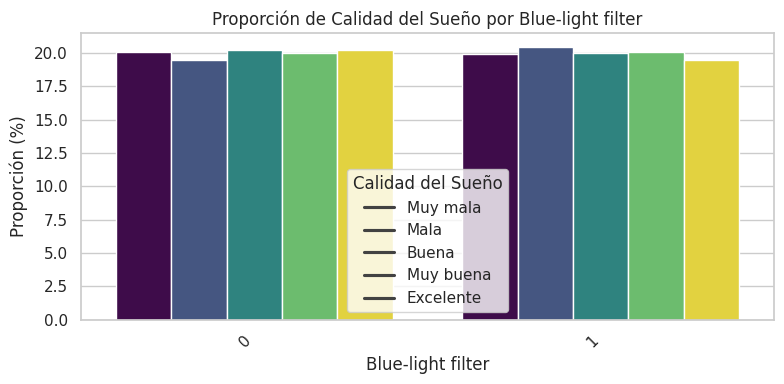

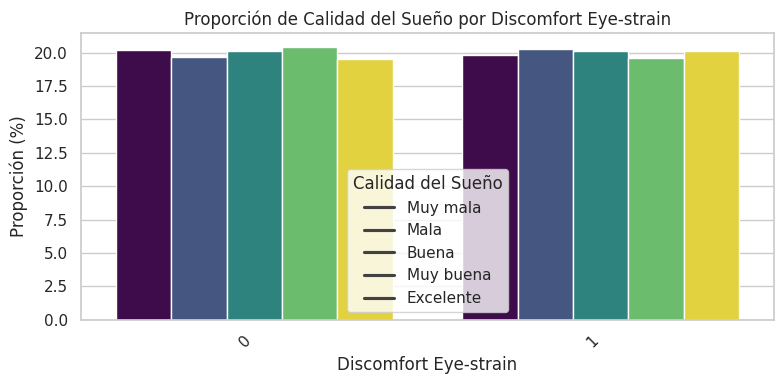

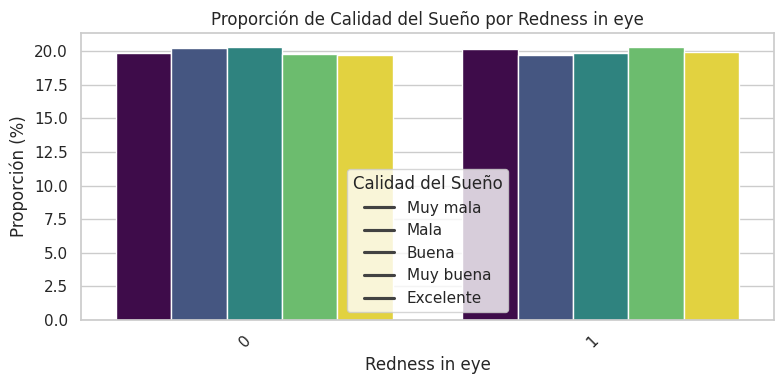

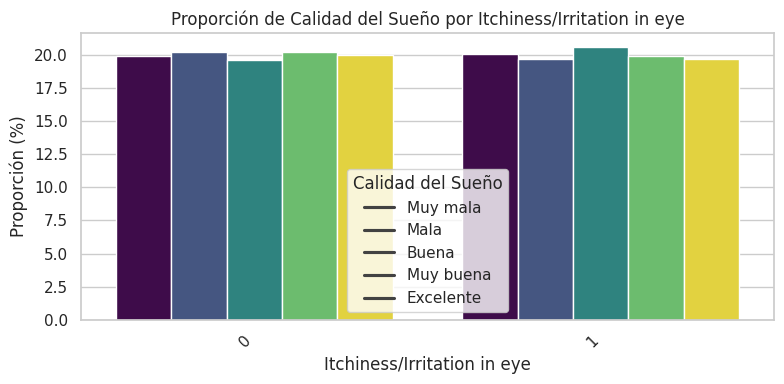

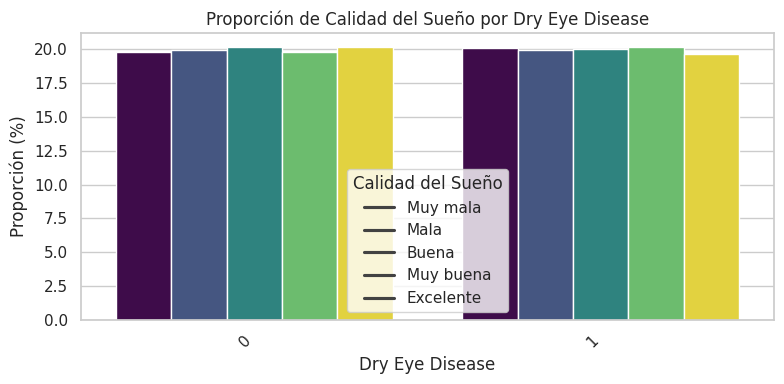

In [188]:
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    # Calcular las proporciones
    df_proportion = df.groupby(col)['Sleep quality'].value_counts(normalize=True).mul(100).rename('Proporción').reset_index()
    sns.barplot(data=df_proportion, x=col, y='Proporción', hue='Sleep quality', palette='viridis')
    plt.title(f'Proporción de Calidad del Sueño por {col}')
    plt.xlabel(col)
    plt.ylabel('Proporción (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Calidad del Sueño', labels=['Muy mala', 'Mala', 'Buena', 'Muy buena', 'Excelente'])
    plt.tight_layout()
    plt.show()

En el análisis proporcional de las variables categóricas se nota que la distribución es bastante homogénea.

## 3.4 Matriz de correlación

In [189]:
corr_features = numerical_continuous + ['Sleep quality']
correlation_matrix = df[corr_features].corr()

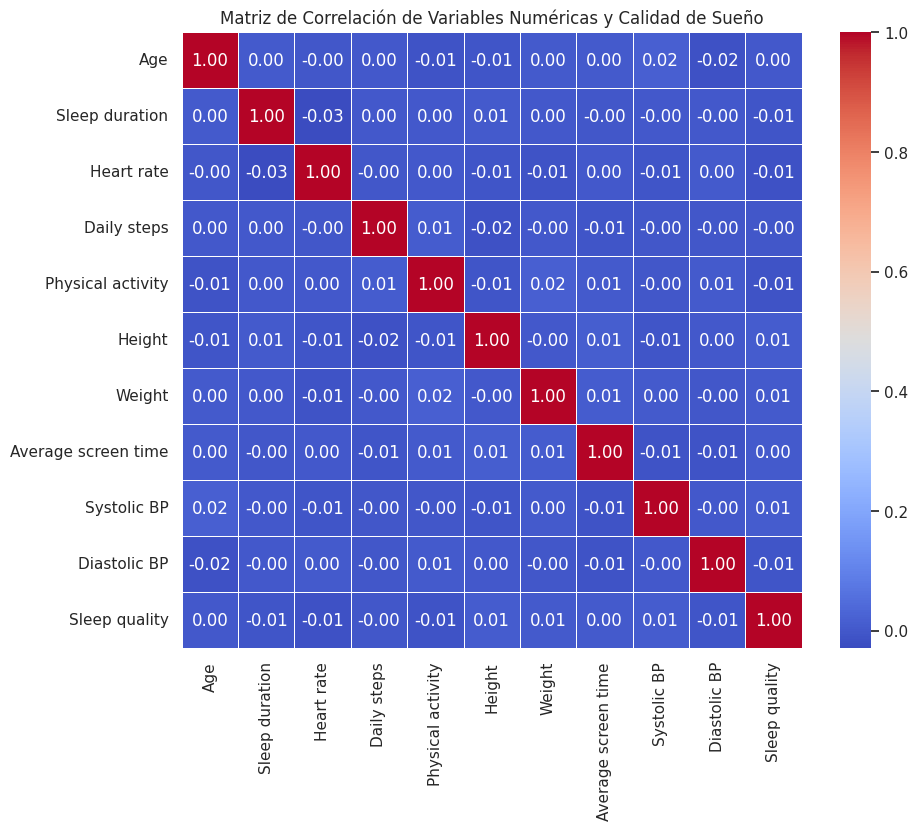

In [190]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas y Calidad de Sueño')
plt.show()

In [191]:
print("Correlaciones con la variable 'Calidad de Sueño':")
correlation_matrix['Sleep quality'].sort_values(ascending=False)

Correlaciones con la variable 'Calidad de Sueño':


,Sleep quality
Sleep quality,1.000000
Height,0.009380
Systolic BP,0.007444
Weight,0.005604
Average screen time,0.004697
Age,0.002513
Daily steps,-0.003074
Diastolic BP,-0.006604
Sleep duration,-0.006892
Physical activity,-0.010329


La mayoría de los coeficientes de correlación parecen estar bastante cerca de cero, lo que sugiere relaciones lineales débiles entre muchas de las variables.

# 4.Feature Engineering (Ingeniería de Características)

## 4.1 Calculo índica de masa corporal

In [192]:
# Convertir la altura de centímetros a metros
df['Height_m'] = df['Height'] / 100

# Calcular el Índice de Masa Corporal (IMC)
df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)

# Mostrar las primeras filas con la nueva característica
print(df[['Height', 'Height_m', 'Weight', 'BMI']].head())

   Height  Height_m  Weight        BMI
0     161      1.61      69  26.619343
1     164      1.64      87  32.346817
2     179      1.79      94  29.337411
3     160      1.60      77  30.078125
4     179      1.79      99  30.897912


## 4.2 Categorías por edad

In [193]:
bins_age = [18, 25, 35, 45]
labels_age = ['18-24', '25-34', '35-45']

# Crear la columna de categorías de edad
df['Age Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)

# Mostrar la distribución de las categorías de edad
print(df['Age Group'].value_counts().sort_index())

# Mostrar las primeras filas con la nueva característica
print(df[['Age', 'Age Group']].head())

Age Group
18-24    5045
25-34    7211
35-45    7027
Name: count, dtype: int64
   Age Age Group
0   24     18-24
1   39     35-45
2   45       NaN
3   45       NaN
4   42     35-45


## 4.3 Categorías por tiempo de pantalla

In [194]:
# Definir los rangos de tiempo de pantalla (en horas)
bins_screen_time = [0, 2, 4, 6, 8, 24]
labels_screen_time = ['0-2', '2-4', '4-6', '6-8', '8+']

# Crear la columna de categorías de tiempo de pantalla
df['Screen Time Group'] = pd.cut(df['Average screen time'], bins=bins_screen_time, labels=labels_screen_time, right=False)

# Mostrar la distribución de las categorías de tiempo de pantalla
print(df['Screen Time Group'].value_counts().sort_index())

# Mostrar las primeras filas con la nueva característica
print(df[['Average screen time', 'Screen Time Group']].head())

Screen Time Group
0-2    2090
2-4    4433
4-6    4407
6-8    4420
8+     4650
Name: count, dtype: int64
   Average screen time Screen Time Group
0                  8.7                8+
1                  9.6                8+
2                  4.0               4-6
3                  7.6               6-8
4                  3.5               2-4


## 4.4 Visualización de los nuevos features vs. Calidad de Sueño

In [195]:
new_features = ['BMI', 'Age Group', 'Screen Time Group']

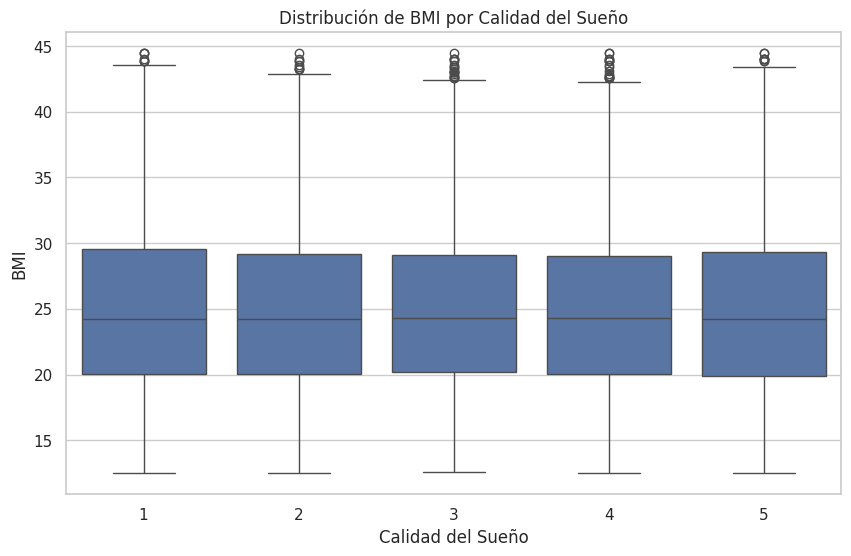

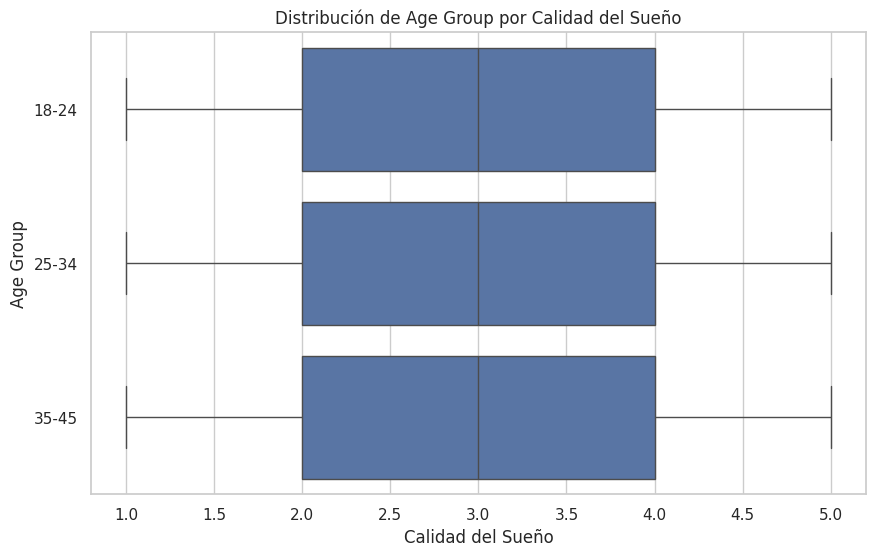

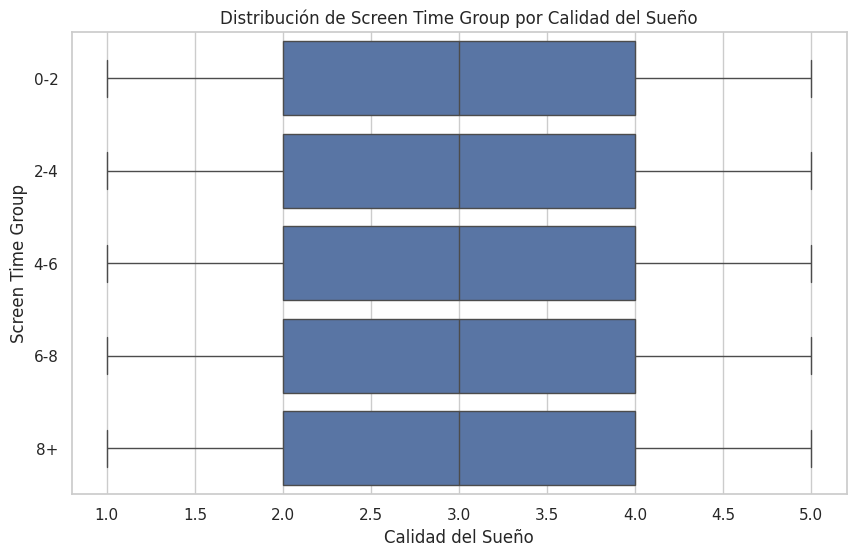

In [196]:
for feature in new_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Sleep quality', y=feature)
    plt.title(f'Distribución de {feature} por Calidad del Sueño')
    plt.xlabel('Calidad del Sueño')
    plt.ylabel(feature)
    plt.show()

In [197]:
categorical_new_features = ['Age Group', 'Screen Time Group']

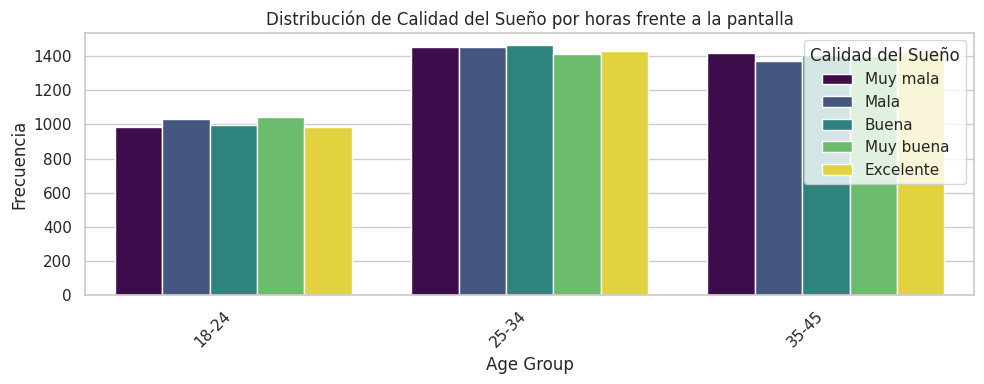

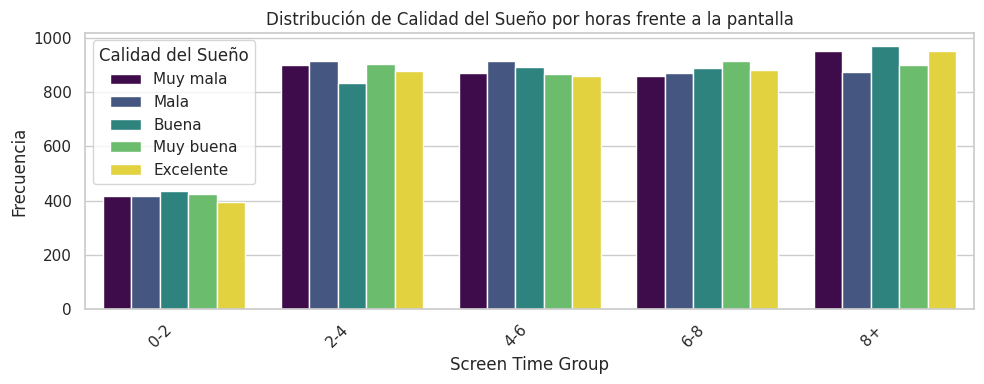

In [198]:
for feature in categorical_new_features:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=feature, hue='Sleep quality', palette='viridis')
    plt.title(f'Distribución de Calidad del Sueño por horas frente a la pantalla')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Calidad del Sueño', labels=['Muy mala', 'Mala', 'Buena', 'Muy buena', 'Excelente'])
    plt.tight_layout()
    plt.show()

<ipython-input-199-18c544586ff2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_proportion = df.groupby(feature)['Sleep quality'].value_counts(normalize=True).mul(100).rename('Proporción').reset_index()


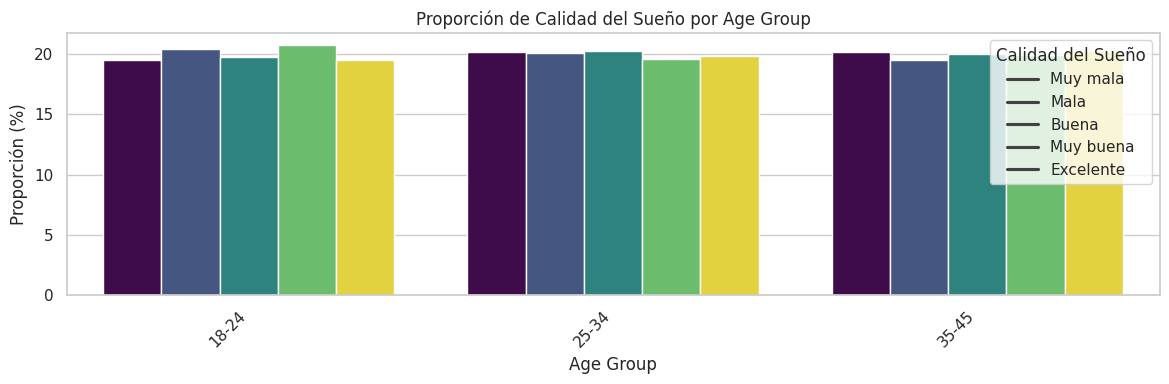

<ipython-input-199-18c544586ff2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_proportion = df.groupby(feature)['Sleep quality'].value_counts(normalize=True).mul(100).rename('Proporción').reset_index()


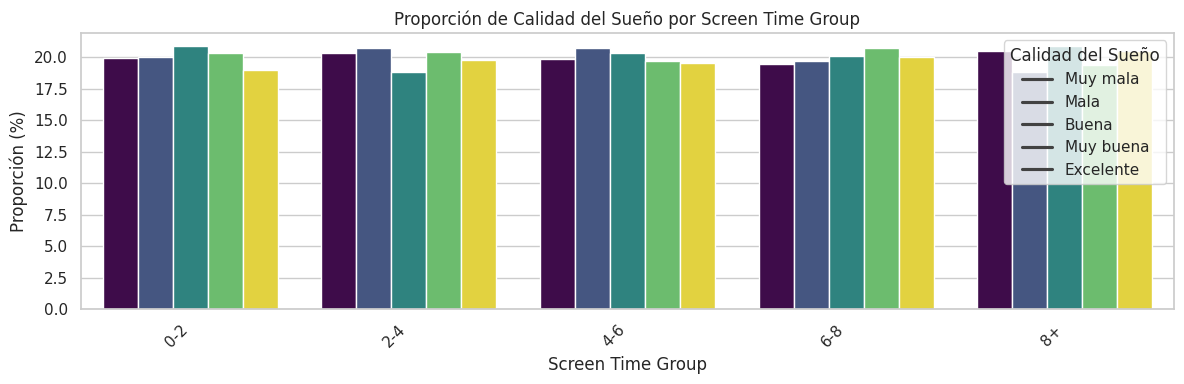

In [199]:
# Crear gráficos de barras de proporciones para cada variable categórica
for feature in categorical_new_features:
    plt.figure(figsize=(12, 4))
    # Calcular las proporciones
    df_proportion = df.groupby(feature)['Sleep quality'].value_counts(normalize=True).mul(100).rename('Proporción').reset_index()
    sns.barplot(data=df_proportion, x=feature, y='Proporción', hue='Sleep quality', palette='viridis')
    plt.title(f'Proporción de Calidad del Sueño por {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proporción (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Calidad del Sueño', labels=['Muy mala', 'Mala', 'Buena', 'Muy buena', 'Excelente'])
    plt.tight_layout()
    plt.show()

Observaciones:

* No parece haber una relación lineal clara y fuerte entre el BMI y la
calidad del sueño basada en estas distribuciones. Las personas con diferentes niveles de BMI reportan todos los niveles de calidad del sueño.

* La dispersión dentro de cada nivel de calidad del sueño abarca varios grupos de edad, lo que sugiere que la edad por sí sola podría no ser un predictor fuerte de la calidad del sueño.

* No se observa una tendencia clara donde un mayor tiempo de pantalla se asocie consistentemente con una menor calidad del sueño, al menos en términos de la mediana de los grupos de tiempo de pantalla pero la dispersión podría ser diferente. Se podría investigar si la variabilidad del tiempo de pantalla es mayor para aquellos con peor calidad de sueño.

* Las observaciobes refuerza la idea de que la calidad del sueño es probablemente un fenómeno multifactorial influenciado por una combinación de variables, incluyendo posiblemente interacciones entre ellas y factores no lineales.

# 5. Preprocesamiento de datos para predicción de calidad de sueño

In [200]:
# Actualizamos la lista de características categóricas a codificar
categorical_features_for_encoding = categorical_features + ['Age Group'] + ['Screen Time Group']
# Lista de características numéricas (las originales continuas)
numerical_features_for_scaling = numerical_continuous + ['BMI']

In [201]:
# Lista completa de características a usar (excluyendo 'Sleep quality')
features = numerical_features_for_scaling + categorical_features_for_encoding
target = 'Sleep quality'

print(f"\nCaracterísticas numéricas a escalar: {numerical_features_for_scaling}")
print(f"Características categóricas a codificar (OneHot): {categorical_features_for_encoding}")
print(f"Variable objetivo: {target}")
print("\n")


Características numéricas a escalar: ['Age', 'Sleep duration', 'Heart rate', 'Daily steps', 'Physical activity', 'Height', 'Weight', 'Average screen time', 'Systolic BP', 'Diastolic BP', 'BMI']
Características categóricas a codificar (OneHot): ['Gender', 'Stress level', 'Sleep disorder', 'Wake up during night', 'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption', 'Smoking', 'Medical issue', 'Ongoing medication', 'Smart device before bed', 'Blue-light filter', 'Discomfort Eye-strain', 'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease', 'Age Group', 'Screen Time Group']
Variable objetivo: Sleep quality




In [202]:
# Definir las características (X) y la variable objetivo (y)
X = df[features]
y = df[target]

In [203]:
# Creo el preprocesador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_for_scaling),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_for_encoding)
    ],
    remainder='passthrough'
)

In [204]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Age', 'Sleep duration', 'Heart rate',
                                  'Daily steps', 'Physical activity', 'Height',
                                  'Weight', 'Average screen time',
                                  'Systolic BP', 'Diastolic BP', 'BMI']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Stress level', 'Sleep disorder',
                                  'Wake up during night',
                                  'Feel sleepy during day',
                                  'Caffeine consumption', 'Alcohol consumption',
                                  'Smoking', 'Medical issue',
                                  'Ongoing medication',
                                  'Smart device before bed',
                                  'Blue-light filter', 'Discomfort Eye-strain',
                                  'Redness in eye',
                                  'Itchiness/Irritation in eye',
                                  'Dry Eye Disease', 'Age Group',
                                  'Screen Time Group'])])

# 6. División de datos en datos de entrenamiento y datos de testeo para predicción de calidad de sueño

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [206]:
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (15000, 29)
Tamaño del conjunto de prueba (X_test): (5000, 29)
Tamaño del conjunto de entrenamiento (y_train): (15000,)
Tamaño del conjunto de prueba (y_test): (5000,)


In [207]:
print("\nDistribución de la variable objetivo en Train vs Test:")
print(f"Train: \n{y_train.value_counts(normalize=True)}")
print(f"Test: \n{y_test.value_counts(normalize=True)}")


Distribución de la variable objetivo en Train vs Test:
Train: 
Sleep quality
3    0.201200
4    0.200533
1    0.200133
2    0.199733
5    0.198400
Name: proportion, dtype: float64
Test: 
Sleep quality
3    0.2012
4    0.2004
1    0.2002
2    0.1998
5    0.1984
Name: proportion, dtype: float64


# 7. Construcción y entrenamiento del modelo para predicción de calidad de sueño

In [208]:
# Creación del pipeline: incluye el preprocesador y el clasificador
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
    # n_estimators: número de árboles en el bosque.
    # random_state: para reproducibilidad.
])

In [209]:
# Entrenar el pipeline completo (preprocesamiento + modelo)
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Sleep duration',
                                                   'Heart rate', 'Daily steps',
                                                   'Physical activity',
                                                   'Height', 'Weight',
                                                   'Average screen time',
                                                   'Systolic BP',
                                                   'Diastolic BP', 'BMI']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Stress level',
                                                   'Sleep disorder',
                                                   'Wake up durin...
                                                   'Feel sleepy during day',
                                                   'Caffeine consumption',
                                                   'Alcohol consumption',
                                                   'Smoking', 'Medical issue',
                                                   'Ongoing medication',
                                                   'Smart device before bed',
                                                   'Blue-light filter',
                                                   'Discomfort Eye-strain',
                                                   'Redness in eye',
                                                   'Itchiness/Irritation in '
                                                   'eye',
                                                   'Dry Eye Disease',
                                                   'Age Group',
                                                   'Screen Time Group'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

# 8. Evaluación del modelo de predicción de calidad de sueño

In [210]:
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva (1)

## 8.1 Accuracy

In [211]:
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Accuracy Score ---")
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

--- Accuracy Score ---
Accuracy en el conjunto de prueba: 0.1944


## 8.2 Matrix de Confusión

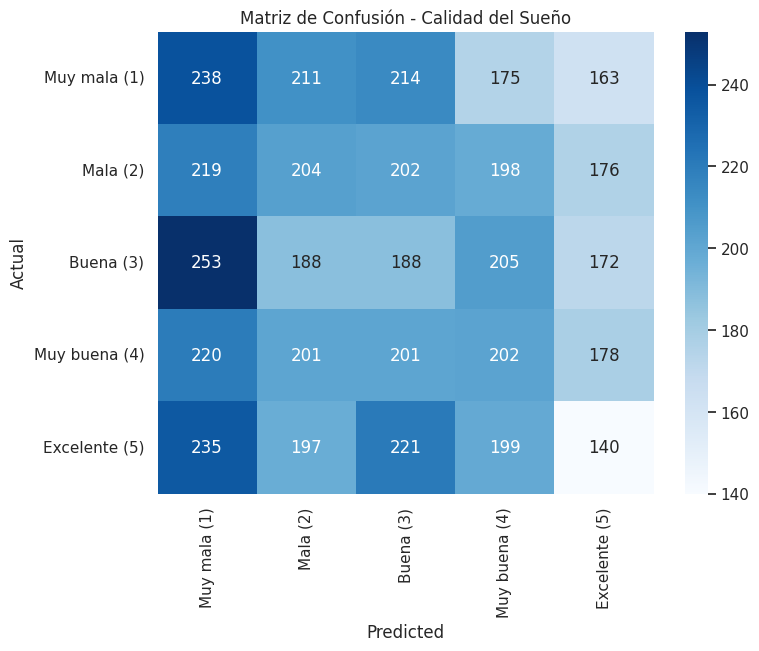

In [212]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Muy mala (1)', 'Mala (2)', 'Buena (3)', 'Muy buena (4)', 'Excelente (5)'],
            yticklabels=['Muy mala (1)', 'Mala (2)', 'Buena (3)', 'Muy buena (4)', 'Excelente (5)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Calidad del Sueño')
plt.show()

## 8.3 Reporte de Clasificación y conclusiones

In [213]:
target_names = ['Muy mala (1)', 'Mala (2)', 'Buena (3)', 'Muy buena (4)', 'Excelente (5)']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

 Muy mala (1)       0.20      0.24      0.22      1001
     Mala (2)       0.20      0.20      0.20       999
    Buena (3)       0.18      0.19      0.19      1006
Muy buena (4)       0.21      0.20      0.20      1002
Excelente (5)       0.17      0.14      0.15       992

     accuracy                           0.19      5000
    macro avg       0.19      0.19      0.19      5000
 weighted avg       0.19      0.19      0.19      5000



# 9. Conclusiones del modelo de predicción de Calidad de Sueño

Para la construcción del modelo, se comenzó con un Random Forest Classifier. La evaluación inicial arrojó un accuracy de aproximadamente 0.20 en el conjunto de prueba, lo que indica un rendimiento similar al azar para un problema de clasificación de cinco clases.

Con el objetivo de mejorar el rendimiento del Random Forest, se implementó una búsqueda de hiperparámetros utilizando GridSearchCV. Se exploraron diversas combinaciones de parámetros clave como el número de árboles, la profundidad máxima de los árboles. Sin embargo, los resultados del GridSearchCV no mostraron una mejora sustancial en el accuracy, manteniéndose alrededor del 0.19-0.20.

Adicionalmente, se experimentó con un modelo lineal como la Regresión Logística Multiclase como una línea base. Este modelo logró un accuracy ligeramente superior, alrededor del 0.22. La comparación entre el rendimiento de un modelo no lineal complejo (Random Forest ajustado) y un modelo lineal más simple sugiere que las relaciones predictivas en los datos, para la calidad del sueño, podrían que las características actuales no capturan adecuadamente la complejidad subyacente.

En conclusión, a pesar de los esfuerzos en la exploración, el preprocesamiento y la experimentación con diferentes modelos y ajustes, no se pudo obtener un modelo con una capacidad predictiva significativamente mejor que el azar para la calidad del sueño utilizando las características disponibles.

# 9. Definición de features para predicción de duración de sueño

In [226]:
# Variable objetivo para la duración del sueño
target_duration = 'Sleep duration'

In [231]:
numerical_features_duration =[col for col in numerical_features_for_scaling if col not in (target_duration, 'BMI')]  + ['BMI']
categorical_features_duration = categorical_features + ['Age Group'] + ['Screen Time Group'] + ['Sleep quality']

In [232]:
# Características (usando las mismas que para la calidad del sueño)
features_duration = numerical_features_duration + categorical_features_duration

In [233]:
# Creamos las matrices de características (X) y la variable objetivo (y)
X_duration = df[features_duration]
y_duration = df[target_duration]

# 10. División de datos en datos de entrenamiento y datos de testeo para predicción de duración del sueño

In [234]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_duration, X_test_duration, y_train_duration, y_test_duration = train_test_split(
    X_duration, y_duration, test_size=0.25, random_state=42
)

In [235]:
print(f"Tamaño del conjunto de entrenamiento (X_train_duration): {X_train_duration.shape}")
print(f"Tamaño del conjunto de prueba (X_test_duration): {X_test_duration.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train_duration): {y_train_duration.shape}")
print(f"Tamaño del conjunto de prueba (y_test_duration): {y_test_duration.shape}")

Tamaño del conjunto de entrenamiento (X_train_duration): (15000, 29)
Tamaño del conjunto de prueba (X_test_duration): (5000, 29)
Tamaño del conjunto de entrenamiento (y_train_duration): (15000,)
Tamaño del conjunto de prueba (y_test_duration): (5000,)


# 11. Preprocesamiento de datos para la predicción de la duración del sueño

In [236]:
# Definir el preprocesador
preprocessor_duration = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_duration),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_duration)
    ],
    remainder='passthrough'
)

In [237]:
# Ajustar el preprocesador a los datos de entrenamiento de duración del sueño
preprocessor_duration.fit(X_train_duration)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Age', 'Heart rate', 'Daily steps',
                                  'Physical activity', 'Height', 'Weight',
                                  'Average screen time', 'Systolic BP',
                                  'Diastolic BP', 'BMI']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Stress level', 'Sleep disorder',
                                  'Wake up during night',
                                  'Feel sleepy during day',
                                  'Caffeine consumption', 'Alcohol consumption',
                                  'Smoking', 'Medical issue',
                                  'Ongoing medication',
                                  'Smart device before bed',
                                  'Blue-light filter', 'Discomfort Eye-strain',
                                  'Redness in eye',
                                  'Itchiness/Irritation in eye',
                                  'Dry Eye Disease', 'Age Group',
                                  'Screen Time Group', 'Sleep quality'])])

In [238]:
# Transformar los datos de entrenamiento y prueba
X_train_duration_processed = preprocessor_duration.transform(X_train_duration)
X_test_duration_processed = preprocessor_duration.transform(X_test_duration)

In [239]:
print("Características utilizadas para predecir la duración del sueño:", features_duration)
print("Tamaño del conjunto de entrenamiento para duración:", X_train_duration_processed.shape)
print("Tamaño del conjunto de prueba para duración:", X_test_duration_processed.shape)
print("Tamaño de la variable objetivo de entrenamiento para duración:", y_train_duration.shape)
print("Tamaño de la variable objetivo de prueba para duración:", y_test_duration.shape)

Características utilizadas para predecir la duración del sueño: ['Age', 'Heart rate', 'Daily steps', 'Physical activity', 'Height', 'Weight', 'Average screen time', 'Systolic BP', 'Diastolic BP', 'BMI', 'Gender', 'Stress level', 'Sleep disorder', 'Wake up during night', 'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption', 'Smoking', 'Medical issue', 'Ongoing medication', 'Smart device before bed', 'Blue-light filter', 'Discomfort Eye-strain', 'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease', 'Age Group', 'Screen Time Group', 'Sleep quality']
Tamaño del conjunto de entrenamiento para duración: (15000, 59)
Tamaño del conjunto de prueba para duración: (5000, 59)
Tamaño de la variable objetivo de entrenamiento para duración: (15000,)
Tamaño de la variable objetivo de prueba para duración: (5000,)


# 12. Construcción y entrenamiento del modelo para predicción de la duración del sueño

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [241]:
# Inicializar el modelo de Regresión Lineal
linear_reg_model = LinearRegression()

In [242]:
# Entrenar el modelo con los datos de entrenamiento preprocesados
linear_reg_model.fit(X_train_duration_processed, y_train_duration)

LinearRegression()

In [243]:
# Hacer predicciones en el conjunto de prueba preprocesado
y_pred_linear = linear_reg_model.predict(X_test_duration_processed)

# 13. Evaluación del modelo de predicción de duración del sueño

In [244]:
# Evaluar el modelo utilizando métricas de regresión
mse_linear = mean_squared_error(y_test_duration, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)  # Calcular la RMSE a partir de la MSE
mae_linear = mean_absolute_error(y_test_duration, y_pred_linear)
r2_linear = r2_score(y_test_duration, y_pred_linear)

print("--- Resultados de Regresión Lineal (Predicción de Duración del Sueño) ---")
print(f"Error Cuadrático Medio (MSE): {mse_linear:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_linear:.4f}")
print(f"Error Absoluto Medio (MAE): {mae_linear:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_linear:.4f}")

--- Resultados de Regresión Lineal (Predicción de Duración del Sueño) ---
Error Cuadrático Medio (MSE): 3.0405
Raíz del Error Cuadrático Medio (RMSE): 1.7437
Error Absoluto Medio (MAE): 1.5091
Coeficiente de Determinación (R²): -0.0009


# 14. Conclusiones del modelo de predicción de la duración del sueño

Se exploraron varios modelos de regresión, comenzando con la Regresión Lineal, los resultados mostraron un coeficiente de determinación (R²) muy cercano a cero e incluso ligeramente negativo, junto con errores de predicción (RMSE y MAE) relativamente altos, lo que indicó una falta de capacidad del modelo para explicar la variabilidad en la duración del sueño.

A continuación, se probó un modelo no lineal como el Random Forest Regressor, con la expectativa de que pudiera capturar relaciones más complejas. Sin embargo, el rendimiento de este modelo, con sus hiperparámetros por defecto, fue similar al de la Regresión Lineal, con un R² también muy bajo y errores de magnitud comparable.

Finalmente, se experimentó con el K-Nearest Neighbors Regressor (KNN), variando el número de vecinos ('k'). Los resultados obtenidos con diferentes valores de 'k' tampoco mostraron una mejora significativa, presentando incluso un R² más negativo en algunos casos.


En conclusión, no se logró construir un modelo que pudiera predecir la duración del sueño de manera confiable con las características disponibles en el dataset. El rendimiento consistentemente bajo sugiere que las relaciones entre las variables y la duración del sueño podrían ser complejas, no lineales, influenciadas por factores no incluidos en los datos, o requerir técnicas de modelado más avanzadas para ser capturadas.